### 피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df2 = pd.read_pickle('df2.pkl')
df2.head()

,0,1,2,3,4
0,c0,c1,c3,c2,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [3]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [4]:
# 행, 열, 값 집게에 사용할 열을 1개씩 지정 - 평균 집계

pdf1 = pd.pivot_table(df,
                      index = 'class',    # 행 위치에 들어갈 열
                      columns = 'sex',    #1열 위치에 들어갈 열
                      values = 'age',     # 데이터로 사용할 열
                      aggfunc = ['mean'])   # 데이터 집계 함수

display(pdf1.head())

mean           
sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589

In [5]:
pdf2 = df.pivot_table(index = 'class',             # 행 위치에 들어갈 열
                      columns = 'sex',             #1열 위치에 들어갈 열
                      values = 'survived',         # 데이터로 사용할 열
                      aggfunc = ['mean', 'sum'])   # 데이터 집계 함수

display(pdf2.head())

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [6]:
pdf3 = df.pivot_table(index = ['class', 'sex'],    # 행 위치에 들어갈 열
                      columns = 'survived',        #1열 위치에 들어갈 열
                      values = ['age', 'fare'],    # 데이터로 사용할 열
                      aggfunc = ['mean', 'sum'])   # 데이터 집계 함수

display(pdf3.head())

mean                                        sum           \
                     age                   fare                 age            
survived               0          1           0           1       0        1   
class  sex                                                                     
First  female  25.666667  34.939024  110.604167  105.978159    77.0  2865.00   
       male    44.581967  36.248000   62.894910   74.637320  2719.5  1449.92   
Second female  36.000000  28.080882   18.250000   22.288989   216.0  1909.50   
       male    33.369048  16.022000   19.488965   21.095100  2803.0   240.33   
Third  female  23.818182  19.329787   19.773093   12.464526  1310.0   908.50   

                                     
                    fare             
survived               0          1  
class  sex                           
First  female   331.8125  9644.0125  
       male    4842.9081  3358.6794  
Second female   109.5000  1560.2292  
       male    1773.4958   358.6167  
Third  female  1423.6627   897.4459

In [7]:
pdf4 = titanic.pivot_table(index = ['class'],
                      columns = 'alive',
                      values = ['sibsp', 'parch'],
                      aggfunc = ['mean', 'sum'])

display(pdf4)

mean                                 sum              
           parch               sibsp           parch     sibsp    
alive         no       yes        no       yes    no yes    no yes
class                                                             
First   0.300000  0.389706  0.287500  0.492647    24  53    23  67
Second  0.144330  0.643678  0.319588  0.494253    14  56    31  43
Third   0.384409  0.420168  0.672043  0.436975   143  50   250  52

In [8]:
df = titanic.copy()
pdf1 = pd.pivot_table(df,
                    index = ['class','alone'], 
                    columns =['sex'],  
                    values = 'survived',  
                    aggfunc = ['mean','sum'])  
pdf1

mean              sum     
sex             female      male female male
class  alone                                
First  False  0.966667  0.425532     58   20
       True   0.970588  0.333333     33   25
Second False  0.931818  0.277778     41   10
       True   0.906250  0.097222     29    7
Third  False  0.416667  0.180723     35   15
       True   0.616667  0.121212     37   32

In [9]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf.head()

mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

### 시게열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [10]:
df = pd.read_csv('stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [12]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [13]:
df1 = df.copy()
df1.set_index('new_Date', inplace = True)
df1.drop('Date', axis = 1, inplace = True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [14]:
df1 = df1.reset_index()
df1.head()

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [15]:
df1 = df.copy()
df1['year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [16]:
df1['month'] = df1.new_Date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,year,month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [17]:
# 일정한 기간을 나타내는 Period 객체로 변환

df1['Date-m'] = df1.new_Date.dt.to_period(freq = 'M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,year,month,Date-m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [18]:
df1.set_index('new_Date', inplace = True)
df1.drop('Date', axis = 1, inplace = True)
df1.head()

,Close,Start,High,Low,Volume,year,month,Date-m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [19]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,year,month,Date-m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [20]:
df_d = df1.loc['2018-06-27', 'Start' : 'High']
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [67]:
# 날짜 간격

endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta', inplace = True)
df1.head()

,Close,Start,High,Low,Volume,year,month,Date-m
time_delta,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,1,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,2,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,3,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,4,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,5,2018-06


In [68]:
# 시계열 데이터 만들기

ts_ms = pd.date_range(start = '2019-01-01',
                      end = None,
                      periods = 12,
                      freq = 'MS',          # MS : 월초 / M : 월말 / 3M : 3개월
                      tz = 'Asia/Seoul')

ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [69]:
import warnings
warnings.filterwarnings('ignore')

df_a = df1.iloc[:12, :]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,year,month,Date-m,index
time_delta,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
2018-06-29,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
2018-06-28,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
2018-06-27,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
2018-06-26,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [70]:
# df_a.drop('month', axis = 1, inplace = True)
df_a['month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,year,month,Date-m,index
time_delta,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
2018-06-29,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
2018-06-28,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
2018-06-27,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
2018-06-26,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [71]:
df_a.set_index('month', inplace = True)
df_a.head()

,Close,Start,High,Low,Volume,year,Date-m,index
month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='month'>

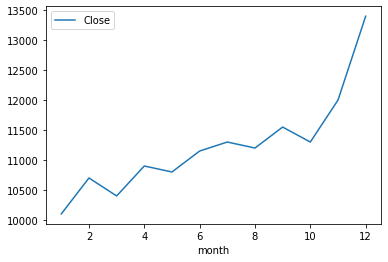

In [72]:
df_g = df_a[['Close']]
df_g.plot()

In [76]:
df_r = df_a.reset_index()
df_a = df_r.set_index('index')
df_a

,month,Close,Start,High,Low,Volume,year,Date-m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06
2019-06-01 00:00:00+09:00,6,11150,11400,11450,11000,55519,2018,2018-06
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06


In [85]:
df_sorted = df_a.sort_index(ascending = False)
df_sorted.head()

,month,Close,Start,High,Low,Volume,year,Date-m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06


In [88]:
df_value = df_a.sort_values(by = 'Volume', ascending = False)
df_value

,month,Close,Start,High,Low,Volume,year,Date-m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06


In [90]:
df_value = df_a.sort_values('Volume', ascending = False) # by 없이도 출력되지만 가능하면 써준다
df_value

,month,Close,Start,High,Low,Volume,year,Date-m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06


In [92]:
# Period 배열

pr_m = pd.period_range(start = '2010-01-01',
                       end = None,
                       periods = 3,
                       freq = 'M') # 월
print(pr_m, '\n')


pr_h = pd.period_range(start = '2010-01-01',
                       end = None,
                       periods = 3,
                       freq = 'H') # 시간
print(pr_h, '\n')

PeriodIndex(['2010-01', '2010-02', '2010-03'], dtype='period[M]') 

PeriodIndex(['2010-01-01 00:00', '2010-01-01 01:00', '2010-01-01 02:00'], dtype='period[H]') 

